# Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import joblib

In [8]:
data = "/content/drive/MyDrive/titanic-project/data/processed/titanic_processed.csv"

In [9]:
df = pd.read_csv(data)

In [10]:
df.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Family_size,IsAlone,title,AgeGroup,FarePerPerson
0,0,1,0,3,male,22.0,1,0,7.2500,S,0,2,0,Mr,Adult,3.62500
1,1,2,1,1,female,38.0,1,0,71.2833,C,1,2,0,Mrs,Adult,35.64165
2,2,3,1,3,female,26.0,0,0,7.9250,S,0,1,1,Miss,Adult,7.92500
3,3,4,1,1,female,35.0,1,0,53.1000,S,1,2,0,Mrs,Adult,26.55000
4,4,5,0,3,male,35.0,0,0,8.0500,S,0,1,1,Mr,Adult,8.05000


In [11]:
df.shape

(891, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     891 non-null    int64  
 1   PassengerId    891 non-null    int64  
 2   Survived       891 non-null    int64  
 3   Pclass         891 non-null    int64  
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Fare           891 non-null    float64
 9   Embarked       891 non-null    object 
 10  Has_Cabin      891 non-null    int64  
 11  Family_size    891 non-null    int64  
 12  IsAlone        891 non-null    int64  
 13  title          891 non-null    object 
 14  AgeGroup       891 non-null    object 
 15  FarePerPerson  891 non-null    float64
dtypes: float64(3), int64(9), object(4)
memory usage: 111.5+ KB


In [13]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Family_size,IsAlone,FarePerPerson
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208,0.228956,1.904602,0.602694,19.916375
std,257.353842,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429,0.420397,1.613459,0.489615,35.841257
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,7.250000
50%,445.000000,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,8.300000
75%,667.500000,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000,23.666667
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,11.000000,1.000000,512.329200


# Exploratory Data Analysis (EDA)

In [14]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [16]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


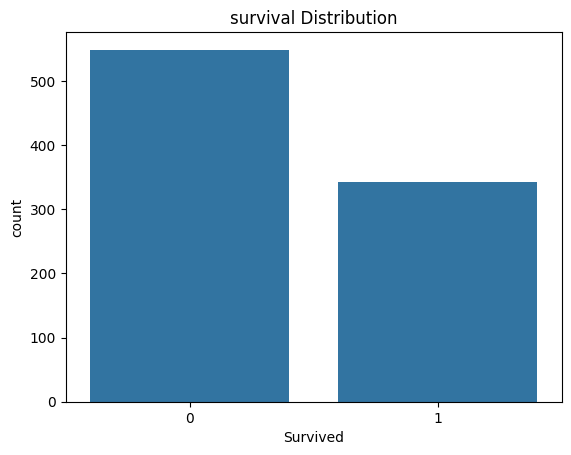

In [17]:
sns.countplot(x='Survived',data=df)
plt.title('survival Distribution')
plt.show()

In [64]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/SurvivalDistribution.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

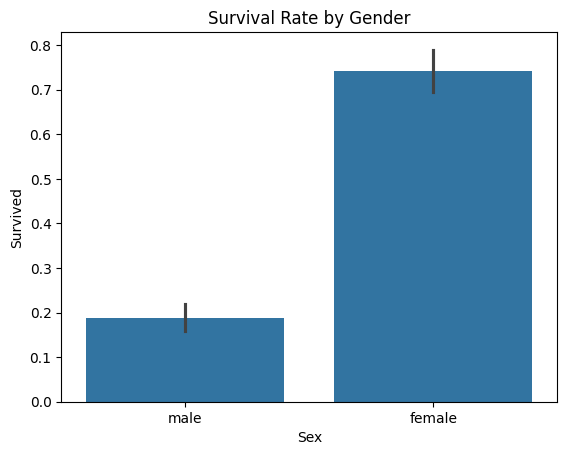

In [18]:
sns.barplot(x='Sex',y='Survived',data = df)
plt.title('Survival Rate by Gender')
plt.show()

In [63]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/SurvivalRateByGender.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

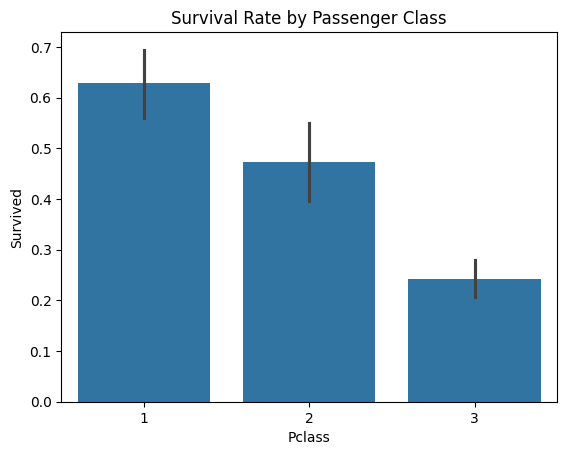

In [19]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [62]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/SurvivalRateBy_PassegenrClass.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

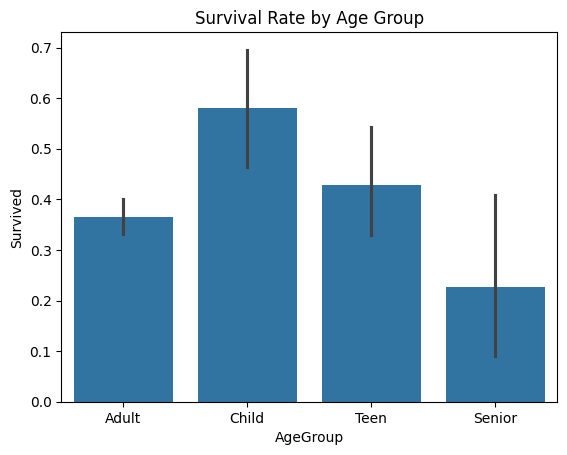

In [20]:
sns.barplot(x='AgeGroup',y='Survived',data=df)
plt.title("Survival Rate by Age Group")
plt.show()

In [61]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/SurvivalRateBy_AgeGroup.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

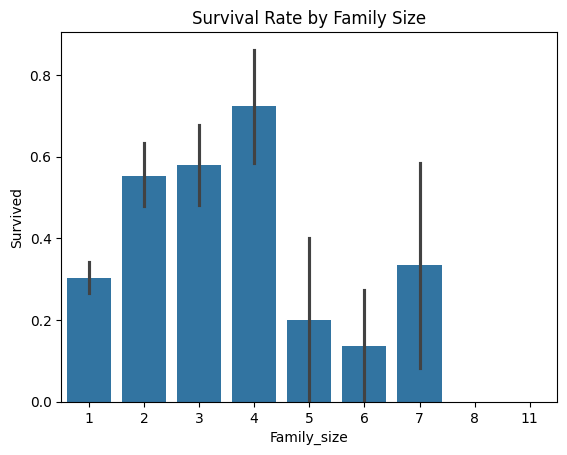

In [21]:
sns.barplot(x='Family_size',y='Survived',data=df)
plt.title("Survival Rate by Family Size")
plt.show()

In [60]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/SurvivalRate_ByFamilySize.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

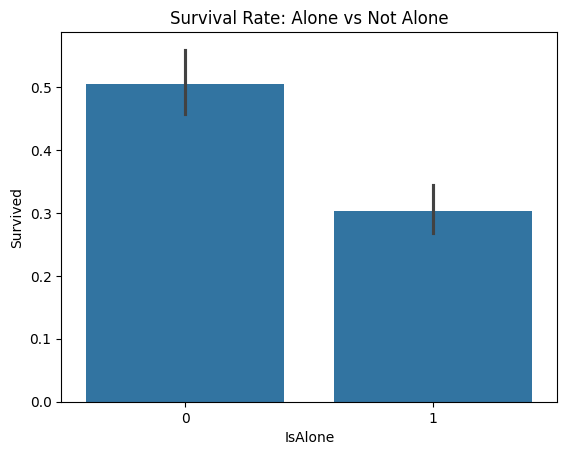

In [22]:
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title("Survival Rate: Alone vs Not Alone")
plt.show()

In [59]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/SurvivalRateBy_FamilyStatus.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

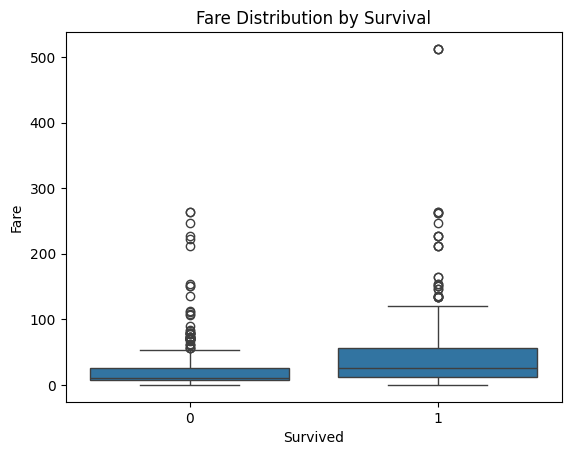

In [23]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

In [58]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/FareDistributionBySurvived.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

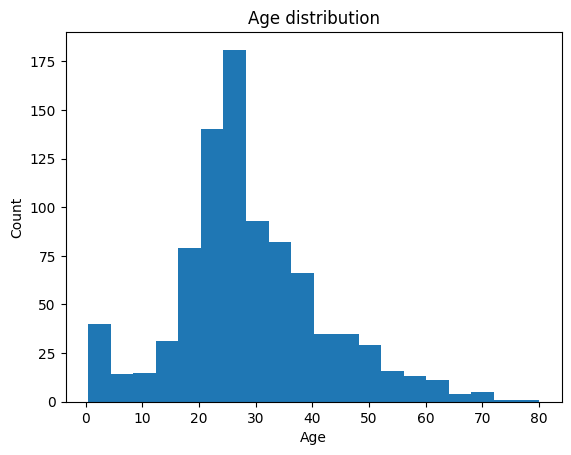

In [24]:
plt.hist(df['Age'],bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [57]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/AgeDistribution.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

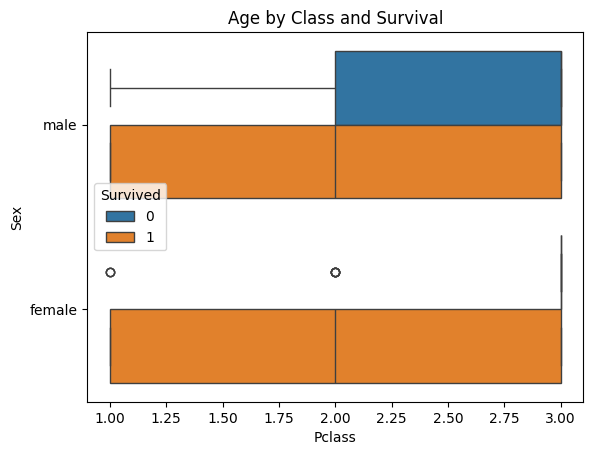

In [25]:
sns.boxplot(x='Pclass',y='Sex',hue='Survived',data=df)
plt.title('Age by Class and Survival')
plt.show()

In [56]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/AgeByClass&Survived.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

In [26]:
import plotly.express as px
fig=px.bar(df,x='Sex',y='Survived',color='Pclass',barmode='group')
fig.show()

In [55]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/SurvivedByPclass&Sex.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     891 non-null    int64  
 1   PassengerId    891 non-null    int64  
 2   Survived       891 non-null    int64  
 3   Pclass         891 non-null    int64  
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Fare           891 non-null    float64
 9   Embarked       891 non-null    object 
 10  Has_Cabin      891 non-null    int64  
 11  Family_size    891 non-null    int64  
 12  IsAlone        891 non-null    int64  
 13  title          891 non-null    object 
 14  AgeGroup       891 non-null    object 
 15  FarePerPerson  891 non-null    float64
dtypes: float64(3), int64(9), object(4)
memory usage: 111.5+ KB


In [28]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [29]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [30]:
#Convert categorical to numbers
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Embarked']= df['Embarked'].map({'S':0,'C':1,'Q':2})

In [31]:
df['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [32]:
df['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     891 non-null    int64  
 1   PassengerId    891 non-null    int64  
 2   Survived       891 non-null    int64  
 3   Pclass         891 non-null    int64  
 4   Sex            891 non-null    int64  
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Fare           891 non-null    float64
 9   Embarked       891 non-null    int64  
 10  Has_Cabin      891 non-null    int64  
 11  Family_size    891 non-null    int64  
 12  IsAlone        891 non-null    int64  
 13  title          891 non-null    object 
 14  AgeGroup       891 non-null    object 
 15  FarePerPerson  891 non-null    float64
dtypes: float64(3), int64(11), object(2)
memory usage: 111.5+ KB


In [34]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [35]:
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Family_size,IsAlone,title,AgeGroup,FarePerPerson
0,0,0,3,0,22.0,1,0,7.2500,0,0,2,0,Mr,Adult,3.62500
1,1,1,1,1,38.0,1,0,71.2833,1,1,2,0,Mrs,Adult,35.64165
2,2,1,3,1,26.0,0,0,7.9250,0,0,1,1,Miss,Adult,7.92500
3,3,1,1,1,35.0,1,0,53.1000,0,1,2,0,Mrs,Adult,26.55000
4,4,0,3,0,35.0,0,0,8.0500,0,0,1,1,Mr,Adult,8.05000


In [36]:
df = df.drop([ 'SibSp', 'Parch'], axis=1)

In [37]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [38]:
title_Maping={
    'Mr' :0,
    'Mrs' :1,
    'Miss' :2,
    'Master' :3,
    'Rare':4
}

In [39]:
df['title']=df['title'].map(title_Maping)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])

In [41]:
df['AgeGroup'].value_counts()

,count
AgeGroup,
0,730
3,70
1,69
2,22


# Split Data into Train & Test

In [42]:
x=df.drop('Survived',axis=1)

In [43]:
y=df['Survived']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Train Several Models

In [45]:
# 1. Logistic Regression
lr= LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Accuracy : ", accuracy_score(y_test,y_pred_lr))

Logistic Regression Accuracy :  0.7988826815642458


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [46]:
# 2. Random Forest
Rf = RandomForestClassifier(n_estimators=100,random_state=42)
Rf.fit(x_train,y_train)
y_pred_Rf=Rf.predict(x_test)
print("Random Forest Accuracy : ", accuracy_score(y_test,y_pred_Rf))

Random Forest Accuracy :  0.8491620111731844


In [47]:
# 3. Support Vector Machine
SVM = SVC(kernel='rbf')
SVM.fit(x_train,y_train)
y_pred_Svm = SVM.predict(x_test)
print("SVM Accuracy : ", accuracy_score(y_test,y_pred_Svm))

SVM Accuracy :  0.6033519553072626


# Evaluate the Best Model

In [48]:
print(classification_report(y_test,y_pred_Rf))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [49]:
# Feature importance
importances = pd.DataFrame({
    'Feature' : x.columns,
    'Importance' : Rf.feature_importances_
}).sort_values('Importance',ascending=False)

In [50]:
print(importances)

          Feature  Importance
9           title    0.165024
0      Unnamed: 0    0.145715
4            Fare    0.134464
2             Sex    0.132717
11  FarePerPerson    0.121235
3             Age    0.119864
1          Pclass    0.057104
7     Family_size    0.049293
6       Has_Cabin    0.026822
5        Embarked    0.023763
10       AgeGroup    0.014345
8         IsAlone    0.009655


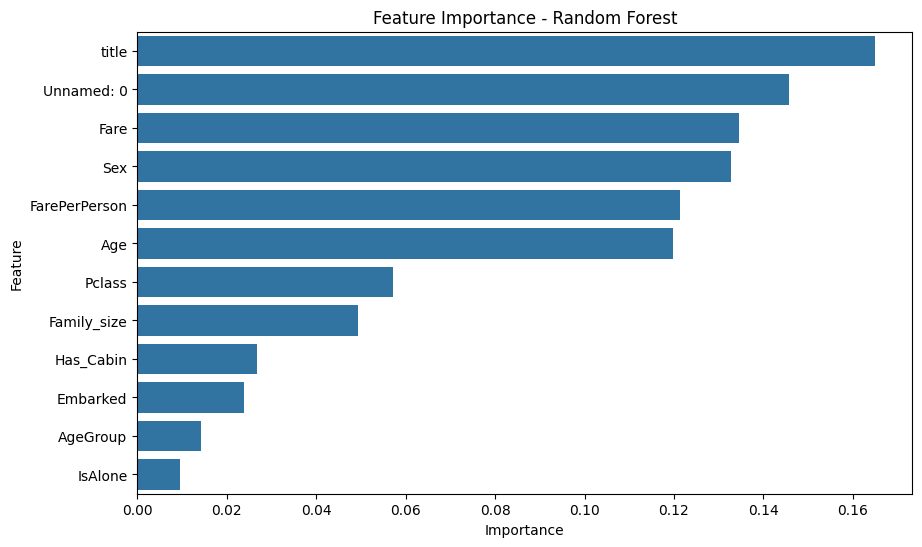

In [51]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importances)
plt.title('Feature Importance - Random Forest')
plt.show()

In [54]:
plt.savefig("/content/drive/MyDrive/titanic-project/Photos/Feature_Importance.png",dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

<Figure size 640x480 with 0 Axes>

# Save & Export the Model

In [52]:
joblib.dump(Rf,'/content/drive/MyDrive/titanic-project/Models/titanic_random_forest_model.pkl')

['/content/drive/MyDrive/titanic-project/Models/titanic_random_forest_model.pkl']